In [1]:
import numpy as np 
from brian2tools import *
from tools.functions import *
from tools.srbm_reconstruction import *
import matplotlib.pyplot as plt

In [2]:
date = '2023-04-19'
time = '16-45'
path = "output/"

W, Wvh, Wch, mBv, mBh, b_c, b_v, b_h, mB = load_matrices(date, time, path)


Matrices loaded from output/output/2023-04-19/16-45//


In [13]:
# load data that has been saved by main file 
length_stimuli = 100
num_classes = 5

train_test_sequence_data = load_data(len_stimuli = length_stimuli, 
          n_classes=num_classes,
          n_obs = 4000, 
          var_prot=0.1,
          repl_var=0.1)

if length_stimuli != N_v or num_classes != n_classes:
    print("The data does not fit the parameters in common_parameters.py. Please adjust the parameters in common_parameters.py to fit the data.")

Data loaded from data/data_5_0.1_0.1_100_4000.npy


In [8]:
def hamming_distance(x, y):
    return np.sum(np.abs(x-y))

In [14]:
# Preparing the data
sequence_data = get_data(n_samples=n_samples, min_p = .00001, max_p = .98, binary = True, seed=0, 
                           load_from_drive=False, data=train_test_sequence_data, num_classes = range(n_classes))

In [18]:
hacked_digit = create_single_Id(idx = 3, data = data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                                beta_parameter = beta_parameter, mult_class=0.0,mult_data=1.0)
hacked_digit[:N_v].reshape(28,28)[:,:14] = 0.
cl = np.zeros(N_c)
cl[int(3*n_c_unit):int(4*n_c_unit)] = .98
cl[int(6*n_c_unit):int(7*n_c_unit)] = .98
hacked_digit[N_v:]= clamped_input_transform(cl, min_p = 1e-16, max_p = .500+.2e-9)

Ids_demo = np.load('data/ids.npy')
Ids = np.column_stack([
    create_single_Id(3, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0,
    create_single_Id(2, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0),
    create_single_Id(5, data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 1.0, mult_data = 0.0),
    hacked_digit,
    ]).T

#Ids[-1,:N_v] = Ids_demo[-1,:N_v]
#Ids[1,:N_v] = Ids_demo[1,:N_v]

NameError: name 'data' is not defined

In [51]:
Ids = np.column_stack([
    create_single_Id(3, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0) * 0,
    create_single_Id(2, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0),
    create_single_Id(4, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 0.0, mult_data = 1.0),
    create_single_Id(4, sequence_data, N_v = N_v, N_c = N_c, n_c_unit = n_c_unit, 
                    beta_parameter = beta_parameter, 
                    mult_class = 1.0, mult_data = 0.0)
    ]).T

In [52]:
out = main(W, b_v, b_c, b_h, Id = Ids, monitors = True)
Mh, Mv, Mc= out['Mh'], out['Mv'], out['Mc']

Creating equation
0.7433338165283203


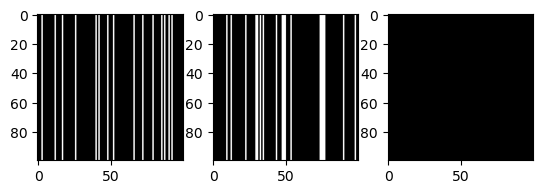

In [53]:
plot_id1=np.array(np.repeat(Ids[1][0:100], 100)).reshape(100,100)
plot_id2=np.array(np.repeat(Ids[2][0:100], 100)).reshape(100,100)
plot_id3=np.array(np.repeat(Ids[3][0:100], 100)).reshape(100,100)

fig, (axs1, axs2, axs3) = plt.subplots(1, 3)
axs1.imshow(plot_id1.T, cmap='gray')
axs2.imshow(plot_id2.T, cmap='gray') 
axs3.imshow(plot_id3.T, cmap='gray') 

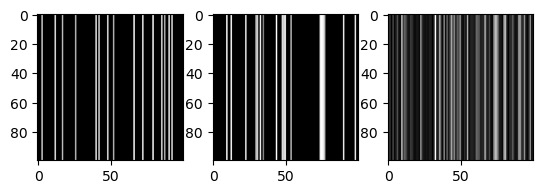

In [58]:
input = np.repeat(np.array(spike_histogram(Mv,T1_s+10*t_ref,T1_e)).T[1], 100).reshape(100,100)
dream = np.repeat(np.array(spike_histogram(Mv,T2_s+60*t_ref,T2_e)).T[1], 100).reshape(100,100)
completion = np.repeat(np.array(spike_histogram(Mv,T3_s+15*t_ref,T3_e)).T[1], 100).reshape(100,100)



fig, (axs1, axs2, axs3) = plt.subplots(1, 3)
axs1.imshow(input.T, cmap='gray')
axs2.imshow(dream.T, cmap='gray')
axs3.imshow(completion.T, cmap='gray')


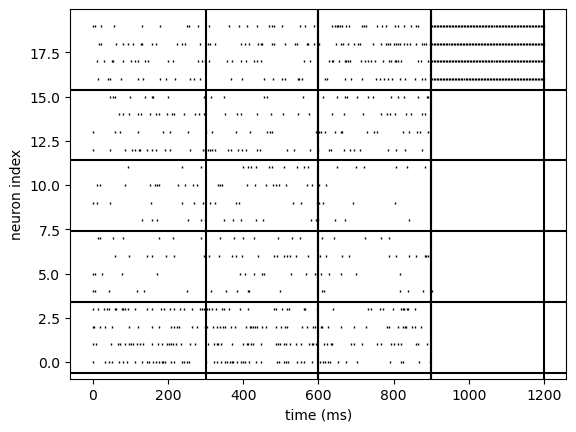

In [55]:

plot_raster(Mc.i, Mc.t, markersize=2,marker='|', color='k', mew=1)
for i in range(n_classes):
    axhline(-0.6+float(i)*4, color='k')
axvline(T1_s/second*1000, color='k')
axvline(T1_e/second*1000, color='k')
axvline(T2_s/second*1000, color='k')
axvline(T2_e/second*1000, color='k')
axvline(T3_s/second*1000, color='k')
axvline(T3_e/second*1000, color='k')

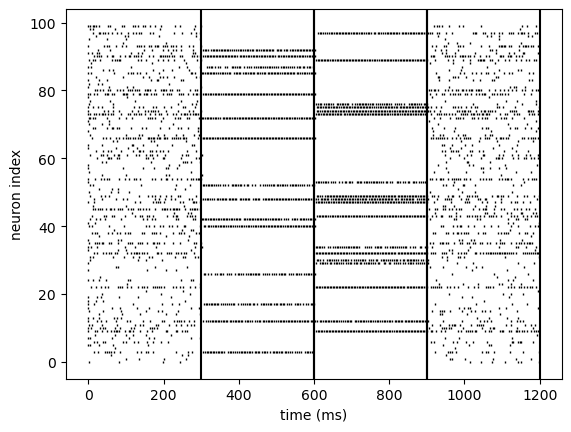

In [56]:
plot_raster(Mv.i, Mv.t, markersize=2,marker='|', color='k', mew=1)
axvline(T1_s/second*1000, color='k')
axvline(T1_e/second*1000, color='k')
axvline(T2_s/second*1000, color='k')
axvline(T2_e/second*1000, color='k')
axvline(T3_s/second*1000, color='k')
axvline(T3_e/second*1000, color='k')

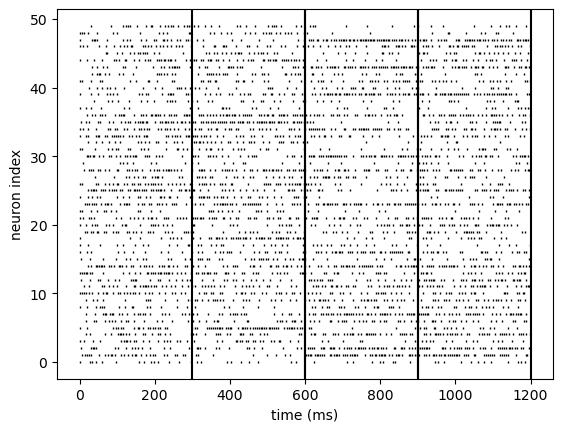

In [57]:
plot_raster(Mh.i, Mh.t, markersize=2,marker='|', color='k', mew=1)
axvline(T1_s/second*1000, color='k')
axvline(T1_e/second*1000, color='k')
axvline(T2_s/second*1000, color='k')
axvline(T2_e/second*1000, color='k')
axvline(T3_s/second*1000, color='k')
axvline(T3_e/second*1000, color='k')